Import dos pacotes

In [2]:
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

import gc 

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
metadados = pd.read_excel('metadata.xlsx')

In [5]:
metadados

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"categorical,nominal","marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)"
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','telephone')"
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,"categorical,ordinal","last contact day of the week ('mon','tue','wed','thu','fri')"


In [6]:
dados = pd.read_csv('new_train.csv', sep=',')

In [7]:
dados.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [8]:
explicativas = dados.drop(columns=['y'], axis=1).copy()

In [9]:
explicativas.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

In [10]:
explicativas.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent


In [11]:
expl_num = explicativas[['age','duration','campaign','pdays','previous']]

In [12]:
expl_num.isnull().sum()

age         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

Transformação por padronização

In [13]:
scale = StandardScaler()

In [14]:
expl_num_scale = scale.fit_transform(expl_num)

In [15]:
expl_num_scale

array([[ 0.86373877, -0.12019627,  0.52298128,  0.19658384, -0.35012691],
       [-0.28972159, -0.2167318 , -0.20368791,  0.19658384,  1.65381294],
       [ 3.65126795,  3.43617293, -0.56702251,  0.19658384, -0.35012691],
       ...,
       [ 1.34434725, -0.49089273,  0.52298128,  0.19658384, -0.35012691],
       [-1.05869515, -0.3596044 , -0.56702251,  0.19658384, -0.35012691],
       [-0.48196498,  1.10387435,  0.15964669,  0.19658384, -0.35012691]])

O algoritmo

In [16]:
db = DBSCAN(eps=0.2)

In [17]:
db

DBSCAN(eps=0.2)

In [18]:
explicativas['DB_eps_02'] = db.fit_predict(expl_num_scale)

In [19]:
explicativas['DB_eps_02'].nunique()

110

Avaliação de melhor eps por meio do silhoette_score

In [20]:
'''
eps = [3,5,9]

for ep in eps:
  model = DBSCAN(eps=ep)
  predicao = model.fit_predict(expl_num_scale)

  score = silhouette_score(expl_num_scale, predicao)

  print("O valor da silhouette_score é {} para um numero de eps igual a {}".format(score, ep))
  '''

'\neps = [3,5,9]\n\nfor ep in eps:\n  model = DBSCAN(eps=ep)\n  predicao = model.fit_predict(expl_num_scale)\n\n  score = silhouette_score(expl_num_scale, predicao)\n\n  print("O valor da silhouette_score é {} para um numero de eps igual a {}".format(score, ep))\n  '

In [21]:
gc.collect()

677

In [22]:
db = DBSCAN(eps=3)

In [23]:
explicativas['DB_eps_3'] = db.fit_predict(expl_num_scale)

In [24]:
explicativas['DB_eps_3'].value_counts()

 0    31722
 1     1225
-1        3
Name: DB_eps_3, dtype: int64

Analise dos resultados por meio das variáveis categoticas

In [25]:
metadados

,Feature,Feature_Type,Description
0,age,numeric,age of a person
1,job,"Categorical,nominal","type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,marital,"categorical,nominal","marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)"
3,education,"categorical,nominal","('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,default,"categorical,nominal","has credit in default? ('no','yes','unknown')"
5,housing,"categorical,nominal","has housing loan? ('no','yes','unknown')"
6,loan,"categorical,nominal","has personal loan? ('no','yes','unknown')"
7,contact,"categorical,nominal","contact communication type ('cellular','telephone')"
8,month,"categorical,ordinal","last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,dayofweek,"categorical,ordinal","last contact day of the week ('mon','tue','wed','thu','fri')"


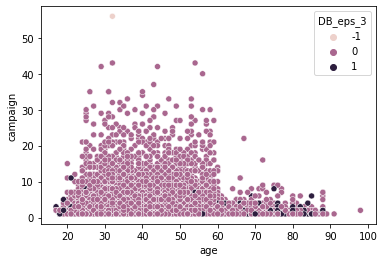

In [26]:
sns.scatterplot(data=explicativas, x='age', y='campaign', hue='DB_eps_3')

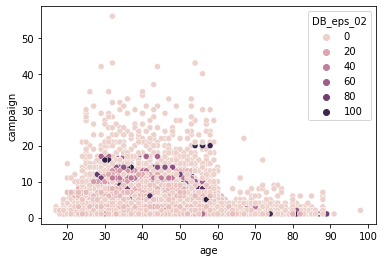

In [27]:
sns.scatterplot(data=explicativas, x='age', y='campaign', hue='DB_eps_02')

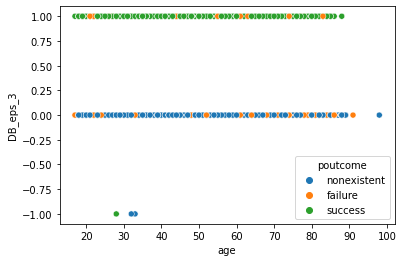

In [28]:
sns.scatterplot(data=explicativas, x='age', y='DB_eps_3', hue='poutcome')

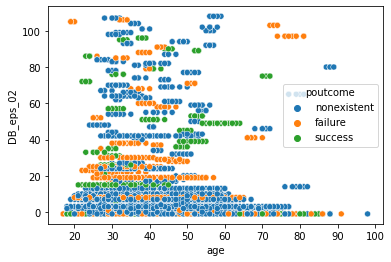

In [29]:
sns.scatterplot(data=explicativas, x='age', y='DB_eps_02', hue='poutcome')

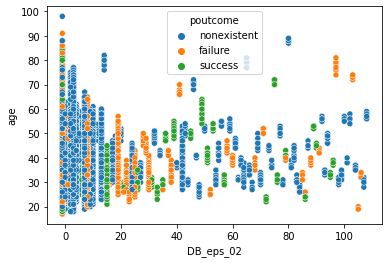

In [31]:
sns.scatterplot(data=explicativas, x='DB_eps_02', y='age', hue='poutcome')

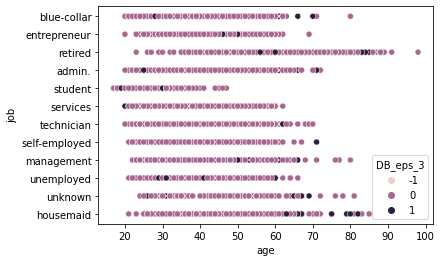

In [32]:
sns.scatterplot(data=explicativas, x='age', y='job', hue='DB_eps_3')

In [33]:
explicativas.groupby(['job','DB_eps_3']).size().unstack()

DB_eps_3,-1,0,1
job,,,
admin.,1.0,7943.0,370.0
blue-collar,1.0,7334.0,106.0
entrepreneur,NaN,1138.0,22.0
housemaid,NaN,820.0,35.0
management,NaN,2260.0,85.0
retired,NaN,1231.0,135.0
self-employed,NaN,1073.0,26.0
services,NaN,3132.0,64.0
student,NaN,595.0,116.0


In [34]:
explicativas['DB_eps_3'].value_counts()

 0    31722
 1     1225
-1        3
Name: DB_eps_3, dtype: int64

In [37]:
explicativas.loc[(explicativas['DB_eps_3'] == -1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,DB_eps_02,DB_eps_3
4770,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,4918,1,999,0,nonexistent,-1,-1
5396,28,blue-collar,married,basic.9y,no,yes,no,cellular,may,tue,3509,2,3,2,success,-1,-1
30176,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,261,56,999,0,nonexistent,-1,-1


In [38]:
explicativas.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,DB_eps_02,DB_eps_3
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,0,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,1,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,-1,0
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,2,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,2,0
